In [89]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [81]:
a = np.array([[0,2,0],[4,1,0],[3,3,0]])
a

array([[0, 2, 0],
       [4, 1, 0],
       [3, 3, 0]])

In [82]:
b = np.array([[-1,-1,0], [-5,0,0], [-2,1,0]])
b

array([[-1, -1,  0],
       [-5,  0,  0],
       [-2,  1,  0]])

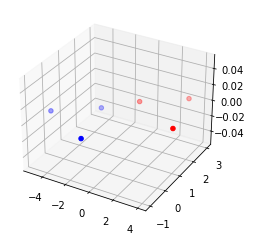

In [69]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(a[:,0], a[:,1], a[:,2], c="r")
ax.scatter(b[:,0], b[:,1], b[:,2], c="b")

plt.show()

In [24]:
b + np.array([5,2,0])

array([[4, 1, 0],
       [0, 2, 0],
       [3, 3, 0]])

In [78]:
b

array([[-1, -1,  0],
       [-5,  0,  0],
       [-2,  1,  0]])

In [79]:
a

array([[0, 2, 0],
       [4, 1, 0],
       [3, 3, 0]])

In [93]:
c = Counter()
for p2 in b:
    for p1 in a:
        c[tuple(p1-p2)] += 1
print(c)

Counter({(5, 2, 0): 3, (1, 3, 0): 1, (4, 4, 0): 1, (9, 1, 0): 1, (8, 3, 0): 1, (2, 1, 0): 1, (6, 0, 0): 1})


In [95]:
c.most_common()[0]

((5, 2, 0), 3)

In [97]:
b + np.array(c.most_common()[0][0])

array([[4, 1, 0],
       [0, 2, 0],
       [3, 3, 0]])

In [46]:
num_matching(a, b)

0

In [34]:
def all_orientations(scanner):
    for dir_x, dir_y in itertools.permutations(range(3), 2):
        for sign_x, sign_y in itertools.product((-1, 1), (-1, 1)):
            x_vec = np.zeros((3,))
            y_vec = np.zeros((3,))
            x_vec[dir_x] = sign_x
            y_vec[dir_y] = sign_y
            z_vec = np.cross(x_vec, y_vec)
            yield np.array(
                [
                    np.array(
                        [
                            np.dot(x_vec, beacon),
                            np.dot(y_vec, beacon),
                            np.dot(z_vec, beacon),
                        ]
                    )
                    for beacon in scanner
                ]
            ).reshape(-1, 3)

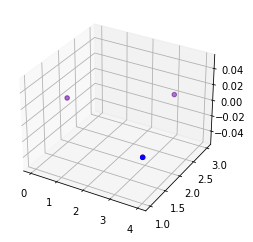

In [48]:
for o in all_orientations(b):
    for offset_x in range(-10, 10):
        for offset_y in range(-10, 10):
            for offset_z in range(-10,10):
                delta = np.array([offset_x, offset_y, offset_z])
                target = o + delta
                if num_matching(a, target) >= 3:
                    fig = plt.figure(figsize=(4,4))

                    ax = fig.add_subplot(111, projection='3d')

                    ax.scatter(a[:,0], a[:,1], a[:,2], c="r")
                    ax.scatter(target[:,0], target[:,1], target[:,2], c="b")

                    plt.show()

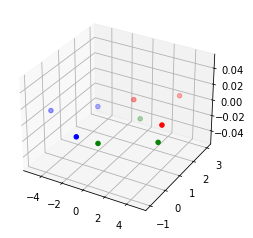

In [52]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

c = list(all_orientations(b))[1]

ax.scatter(a[:,0], a[:,1], a[:,2], c="r")
ax.scatter(b[:,0], b[:,1], b[:,2], c="b")
ax.scatter(c[:,0], c[:,1], c[:,2], c="g")

plt.show()

In [65]:
np.array(list(map(np.linalg.norm, itertools.permutations(a, r=2))))

array([4.58257569, 4.69041576, 4.58257569, 5.91607978, 4.69041576,
       5.91607978])

In [66]:
np.array(list(map(np.linalg.norm, itertools.permutations(b, r=2))))

array([5.19615242, 2.64575131, 5.19615242, 5.47722558, 2.64575131,
       5.47722558])

In [68]:
np.array(list(map(np.linalg.norm, itertools.permutations(list(all_orientations(b))[2], r=2))))

array([5.19615242, 2.64575131, 5.19615242, 5.47722558, 2.64575131,
       5.47722558])

In [98]:
tuple([0,0,0])

(0, 0, 0)